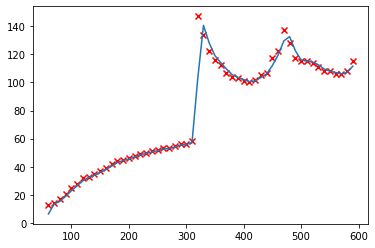

[27 42]


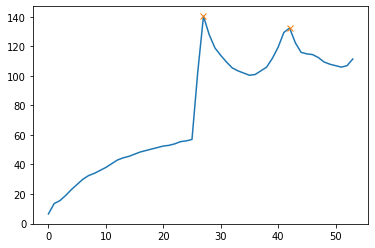

In [93]:
#Classification Main Function
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import math

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


def classification(x, y, order = 1):
    #Check if increasing
    result = np.polyfit(x, y, order)
    slope = result[-2]
    #Increasing
    if slope > 0.1:
         #Now check for spikes
        peaks, _ = find_peaks(np.gradient(y))
        if (len(peaks) >= 1):
             print("Frying")
        else:
            print("Boiling")
         
    #Decreasing or staying the same
    else:
        if(abs(slope) < 0.1):
            if(len(y) > 60):
                print("Send notification! Stove on too long!")
            else:
                print("Stove is at steady temperature and not unattended")
        else:
            print("Stove is cooling down")
            curve_fit = np.polyfit(x, np.log(y), 1)
            roomTempTime = np.log(22/math.e**curve_fit[1])/curve_fit[0]
            print("Time remaining until stove is room temperature (22 C) is " + str(int(roomTempTime - len(x)*10)) + " seconds")
            return


xEgg = np.linspace(start = 60, stop = 590, num = 54)
panEgg = np.array([149, 169, 200, 220, 240, 260, 275])
egg = np.array([13, 14, 17, 21, 25, 28, 32, 33, 35, 37, 39, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 53, 55, 56, 56, 58, 147, 134, 122, 116, 112, 107, 104, 103, 101, 100, 102, 105, 107, 117, 122, 137, 128, 117, 115, 115, 114, 111, 108, 108, 106, 106, 108, 115])
eggNeg = -1 * np.array([13, 14, 17, 21, 25, 28, 32, 33, 35, 37, 39, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 53, 55, 56, 56, 58, 147, 134, 122, 116, 112, 107, 104, 103, 101, 100, 102, 105, 107, 117, 122, 137, 128, 117, 115, 115, 114, 111, 108, 108, 106, 106, 108, 115])

xCoolDown = np.linspace(start = 150, stop = 890, num = 68)
panCoolDown = np.array([191.653443500305,184.013785289397,171.854249896681,161.401627668151,148.934550321434,143.800670527279,138.655462184874,132.566135613593,126.943483275663,121.686383291181,117.830286236358,112.902406864385,109.168262653898,104.512106212348,100.565369004745,92.5224957239534,88.775100221519,86.8147957873109,83.7276176293305,80.0762165331251,78.3439832785909,75.7924411143771,73.1980975946787,71.8432765075439,69.3598338211691,68.3785173012676,66.3957907487323,65.3823188427765,64.6814168705462,62.7620598412381,61.1386092898703,57.2734015072005,54.7893001304459,54.1486874880251,56.766835766565,55.7992341571155,55.6154537286614,54.399195026136,51.2751784821192,50.5581439624311,52.7233750643118,53.2688424206893,52.638756101243,52.6521764640689,52.4001933041586,48.5281868679674,48.1131144046401,48.5239618860094,48.5907090108769,48.0714499929614,47.511858076564,47.1045129162779,47.370088222205,47.3122394497708,46.7303883182092,46.4408441528533,46.0786919418933,44.7987616099074,45.6205247372262,44.1732064726717,43.4261704681874,42.8927335640139,42.5631544925663,41.1945999566719,40.9671635368232,40.7073229291719,40.8180974391241,40.3001972493178])

xEgg2 = np.linspace(start = 60, stop = 590*2, num = 54*2)
egg2 = np.tile(egg, 2)


plt.plot(xEgg, movingaverage(egg, 2))
plt.scatter(xEgg, egg, marker = 'x', c='red')
plt.show()

x1 = np.arange(0, 240, 10)
x2 = np.arange(240, 250, 10)
x3 = np.arange(250, 410, 10)
y1 = 0.5*x1
y2 = np.array([165])
y3 = 0.5*np.arange(0, 160, 10)+170
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))

peaks, _ = find_peaks(movingaverage(egg, 2))
print(peaks)
plt.plot(movingaverage(egg, 2))
plt.plot(peaks, movingaverage(egg, 2)[peaks], "x")
plt.show()


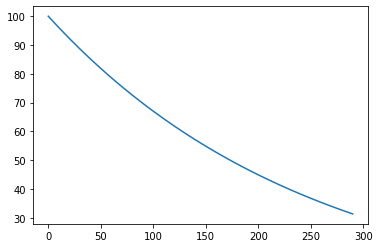

[100.          96.07894392  92.31163464  88.69204367  85.2143789
  81.87307531  78.66278611  75.57837415  72.61490371  69.76763261
  67.0320046   64.40364211  61.87833918  59.4520548   57.12090638
  54.88116361  52.7292424   50.66169924  48.6752256   46.7666427
  44.93289641  43.17105234  41.47829117  39.85190411  38.2892886
  36.78794412  35.3454682   33.95955256  32.62797946  31.34861809]


/var/folders/39/d6r345zd73jb_b_w7j92wkcr0000gn/T/ipykernel_94284/2631698290.py:6: RuntimeWarning: divide by zero encountered in log
  log_x_data = np.log(x)


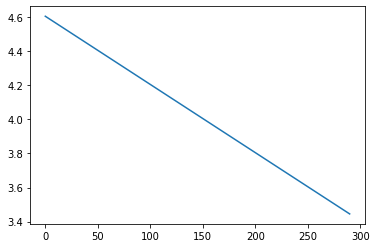

Time remaining until stove is cool is 78 seconds
378.53193315744363
[-4.00000000e-03  4.60517019e+00]


In [87]:
x = np.linspace(0, 290, num = 30)
y = 100*math.e**(-0.004*x)
plt.plot(x,y)
plt.show()
print(y)
log_x_data = np.log(x)
plt.plot(x,np.log(y))
plt.show()
curve_fit = np.polyfit(x, np.log(y), 1)
roomTempTime = np.log(22/math.e**curve_fit[1])/curve_fit[0]
print("Time remaining until stove is cool is " + str(int(roomTempTime - len(x)*10)) + " seconds")
print(roomTempTime)
print(curve_fit)

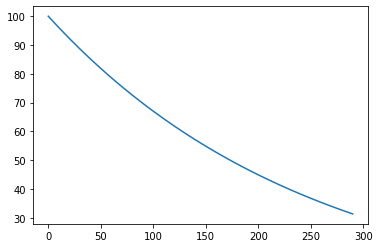

Stove is cooling down
Time remaining until stove is room temperature (22 C) is 78 seconds


In [88]:
##Classification for cooling down
x = np.linspace(0, 290, num = 30)
y = 100*math.e**(-0.004*x)
plt.plot(x,y); plt.show()
classification(x,y)


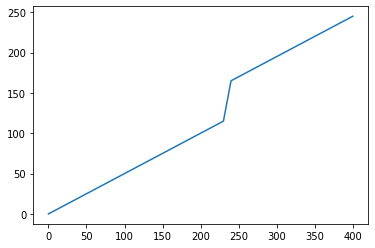

Frying


In [89]:
##Classification for Frying
x1 = np.arange(0, 240, 10)
x2 = np.arange(240, 250, 10)
x3 = np.arange(250, 410, 10)
y1 = 0.5*x1
y2 = np.array([165])
y3 = 0.5*np.arange(0, 160, 10)+170
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
plt.plot(x,y); plt.show()
classification(x,y)

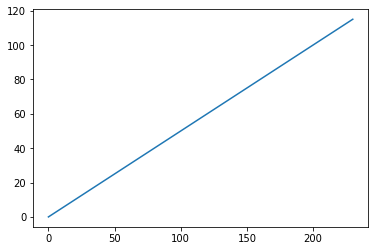

Boiling


In [96]:
##Classification for Frying
x = np.arange(0, 240, 10)
y = 0.5*x
plt.plot(x,y); plt.show()
classification(x,y)

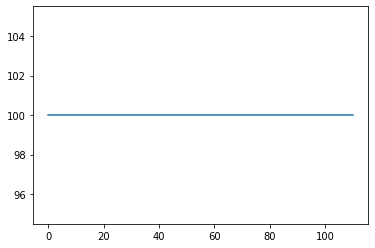

Stove is at steady temperature and not unattended


In [91]:
##Classification for Steady temp (2 mins)
x = np.arange(0, 120, 10)
y = np.tile(100, len(x))
plt.plot(x,y); plt.show()
classification(x,y)

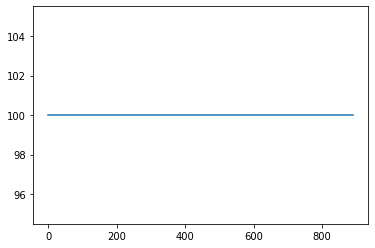

Send notification! Stove on too long!


In [92]:
##Classification for Steady temp (15 mins)
x = np.arange(0, 60*15, 10)
y = np.tile(100, len(x))
plt.plot(x,y); plt.show()
classification(x,y)